In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time
import pandas as pd
import re
import random

user_agent = 'Mozilla/5.0 (X11; Linux x86_64; rv:136.0) Gecko/20100101 Firefox/136.0' # User agent is needed to scrap the website

# Parsing phones data

I will scrap phones and their relevant data from gsmarena website using the links that were collected in the previous step.

Firstly, import the dataset with links.

In [3]:
links = pd.read_csv('../parse_links/all_phone_links_28_03_2025.csv')
links.head()

,acer,alcatel,allview,amazon,amoi,apple,archos,asus,at&t,benefon,...,vodafone,wiko,wnd,xcute,xiaomi,xolo,yezz,yota,yu,zte
0,https://www.gsmarena.com/acer_acerone_liquid_s...,https://www.gsmarena.com/alcatel_1b_(2022)-117...,https://www.gsmarena.com/allview_soul_x7_pro-1...,https://www.gsmarena.com/amazon_fire_max_11-12...,https://www.gsmarena.com/amoi_e860-2038.php,https://www.gsmarena.com/apple_ipad_air_13_(20...,https://www.gsmarena.com/archos_diamond-9593.php,https://www.gsmarena.com/asus_zenfone_12_ultra...,https://www.gsmarena.com/at&t_quickfire-2598.php,https://www.gsmarena.com/benefon_twig_discover...,...,https://www.gsmarena.com/vodafone_smart_v10-97...,https://www.gsmarena.com/wiko_t20-13118.php,https://www.gsmarena.com/wnd_wind_van_gogh_210...,https://www.gsmarena.com/xcute_dv80-1495.php,https://www.gsmarena.com/xiaomi_poco_f7_ultra-...,https://www.gsmarena.com/xolo_era_2x-8520.php,https://www.gsmarena.com/yezz_art_3s-12101.php,https://www.gsmarena.com/yota_yotaphone_3-8727...,https://www.gsmarena.com/yu_ace-9308.php,https://www.gsmarena.com/zte_nubia_focus_2_ult...
1,https://www.gsmarena.com/acer_acerone_liquid_s...,https://www.gsmarena.com/alcatel_1l_pro_(2021)...,https://www.gsmarena.com/allview_soul_x7_style...,https://www.gsmarena.com/amazon_fire_hd_8_plus...,https://www.gsmarena.com/amoi_e78-2037.php,https://www.gsmarena.com/apple_ipad_air_11_(20...,https://www.gsmarena.com/archos_oxygen_68xl-95...,https://www.gsmarena.com/asus_rog_phone_9_pro-...,https://www.gsmarena.com/at&t_smt5700-2603.php,https://www.gsmarena.com/benefon_twig_discover...,...,https://www.gsmarena.com/vodafone_smart_n10-97...,https://www.gsmarena.com/wiko_hi_enjoy_60s-126...,https://www.gsmarena.com/wnd_wind_duo_2300-216...,https://www.gsmarena.com/xcute_dv50-1494.php,https://www.gsmarena.com/xiaomi_poco_f7_pro-13...,https://www.gsmarena.com/xolo_era_2-8395.php,https://www.gsmarena.com/yezz_max_3_ultra-1209...,https://www.gsmarena.com/yota_yotaphone_2-6959...,https://www.gsmarena.com/yu_yureka_2-8864.php,https://www.gsmarena.com/zte_nubia_focus_2-137...
2,https://www.gsmarena.com/acer_chromebook_tab_1...,https://www.gsmarena.com/alcatel_1_(2021)-1098...,https://www.gsmarena.com/allview_viva_803g-103...,https://www.gsmarena.com/amazon_fire_hd_8_(202...,https://www.gsmarena.com/amoi_e76-2036.php,https://www.gsmarena.com/apple_ipad_(2025)-137...,https://www.gsmarena.com/archos_oxygen_63-9595...,https://www.gsmarena.com/asus_rog_phone_9_fe-1...,https://www.gsmarena.com/at&t_mustang-2602.php,https://www.gsmarena.com/benefon_q-42.php,...,https://www.gsmarena.com/vodafone_smart_e9-948...,https://www.gsmarena.com/wiko_t60-12477.php,https://www.gsmarena.com/wnd_wind_duo_2200-216...,https://www.gsmarena.com/xcute_dv2-1481.php,https://www.gsmarena.com/xiaomi_redmi_a5_4g-13...,https://www.gsmarena.com/xolo_era_1x-8339.php,https://www.gsmarena.com/yezz_max_3_plus-12098...,https://www.gsmarena.com/yota_yotaphone-6961.php,https://www.gsmarena.com/yu_yunique_2-8788.php,https://www.gsmarena.com/zte_nubia_neo_3_gt-13...
3,https://www.gsmarena.com/acer_iconia_talk_s-83...,https://www.gsmarena.com/alcatel_3l_(2021)-106...,https://www.gsmarena.com/allview_v4_viper_pro-...,https://www.gsmarena.com/amazon_fire_hd_10_plu...,https://www.gsmarena.com/amoi_e72-2032.php,https://www.gsmarena.com/apple_iphone_16e-1339...,https://www.gsmarena.com/archos_oxygen_57-9596...,https://www.gsmarena.com/asus_rog_phone_9-1350...,https://www.gsmarena.com/at&t_8525-2601.php,https://www.gsmarena.com/benefon_track-43.php,...,https://www.gsmarena.com/vodafone_smart_x9-948...,https://www.gsmarena.com/wiko_5g-12049.php,https://www.gsmarena.com/wnd_wind_duo_2100-216...,https://www.gsmarena.com/xcute_dv1-1480.php,https://www.gsmarena.com/xiaomi_redmi_note_14s...,https://www.gsmarena.com/xolo_era_x-7959.php,https://www.gsmarena.com/yezz_max_3-12099.php,NaN,https://www.gsmarena.com/yu_yureka_black-8714.php,https://www.gsmarena.com/zte_nubia_neo_3-13711...
4,https://www.gsmarena.com/acer_liqu

Finally, try to iterate over dataframe and get the first link for each brand

In [4]:
for brand in links.columns:
    for link in links[brand].dropna():
        print(link)
        break

https://www.gsmarena.com/acer_acerone_liquid_s272e4-13757.php
https://www.gsmarena.com/alcatel_1b_(2022)-11706.php
https://www.gsmarena.com/allview_soul_x7_pro-10302.php
https://www.gsmarena.com/amazon_fire_max_11-12382.php
https://www.gsmarena.com/amoi_e860-2038.php
https://www.gsmarena.com/apple_ipad_air_13_(2025)-13704.php
https://www.gsmarena.com/archos_diamond-9593.php
https://www.gsmarena.com/asus_zenfone_12_ultra-13653.php
https://www.gsmarena.com/at&t_quickfire-2598.php
https://www.gsmarena.com/benefon_twig_discovery_pro-1915.php
https://www.gsmarena.com/benq_f52-7043.php
https://www.gsmarena.com/benq_siemens_sf71-2075.php
https://www.gsmarena.com/bird_m32-1966.php
https://www.gsmarena.com/blackberry_key2_le-9292.php
https://www.gsmarena.com/blackview_bv4800_pro-13716.php
https://www.gsmarena.com/blu_bold_n3-12603.php
https://www.gsmarena.com/bosch_909_dual_s-183.php
https://www.gsmarena.com/bq_aquaris_x2_pro-9197.php
https://www.gsmarena.com/casio_g_zone_ca_201l-5384.php
https

## Helper function
`replace_duplicate_columns` checks for duplicate names in a pandas dataframe columns. If such columns are found, it adds a subscript to make them unique and assigns new names to the columns.

In [5]:
def duplicate_names(df):
    # Create a dictionary to track counts of each column name
    column_count = {}

    # Rename duplicate columns
    new_columns = []
    for col in df.columns:
        # Check if the column name has been seen before
        if col in column_count:
            # Increment the count for this column name
            column_count[col] += 1
            # Create a new column name with a suffix
            new_col_name = f"{col}_{column_count[col]}"
            # Ensure the new name is unique
            while new_col_name in new_columns:
                column_count[col] += 1
                new_col_name = f"{col}_{column_count[col]}"
            new_columns.append(new_col_name)
        else:
            # First occurrence of the column name
            column_count[col] = 1
            new_columns.append(col)

    # Assign the new column names to the DataFrame
    df.columns = new_columns

In [6]:
test_links = links.iloc[:2, :2]
test_links

,acer,alcatel
0,https://www.gsmarena.com/acer_acerone_liquid_s...,https://www.gsmarena.com/alcatel_1b_(2022)-117...
1,https://www.gsmarena.com/acer_acerone_liquid_s...,https://www.gsmarena.com/alcatel_1l_pro_(2021)...


In [41]:
def get_phone_data(url, phones, phones_sentiment):
    # Intermidiate dataframes
    phone_sentiment = pd.DataFrame()
    phone = pd.DataFrame()

    response = requests.get(url, headers = {'User-agent': user_agent})
    if response.status_code == 200:
        # Get tables
        soup = BeautifulSoup(response.text, 'html.parser')
        tables: list[BeautifulSoup] = soup.find('div', id='specs-list').find_all('table')

        headers: list[str] = []
        entries: list[str] = []
        # All tables in given url
        for table in tables:
            head = table.find('th')
            headers = headers + [head.text + '_' + header.text for header in table.find_all('td', class_="ttl")]
            entries = entries + [data.text for data in table.find_all('td', class_="nfo")]
        headers_cleaned = [header.replace('\xa0', 'DummyType_') for header in headers]
        phone = pd.DataFrame(data=[entries], columns=headers_cleaned)
        phone.insert(0, 'name', soup.find('h1', class_='specs-phone-name-title').text)
        phone['photo_link'] = soup.find('div', class_='specs-photo-main').find('img')['src']
        phone['phone_link'] = url
        phone['release_date'] = soup.find('span', attrs={'data-spec': 'released-hl'}).text
        phone['popularity_percent'] = soup.find('li', class_='light pattern help help-popularity').find('strong').text
        phone['popularity_hits'] = soup.find('li', class_='light pattern help help-popularity').find('span').text
        phone['popularity_become_fan'] = soup.find('li', class_='light pattern help help-fans').find('strong').text
        phone['popularity_comments_number'] = soup.find('div', id='opinions-total').find('b').text
        duplicate_names(phone)

        # Check if brand still creates new phones from 2024 or 2025

        if not (phone['Launch_Announced'].str.contains(r'2020|2021|2022|2023|2024|2025|2026').any()):
            return phones, phones_sentiment, 2
        
        phones = pd.concat([phones, phone], ignore_index=True)

        # Get sentiment
        user_threads = soup.find_all('div', class_='user-thread')
        comment_opinion: list[str] = []
        commenter_name: list[str] = []
        commenter_location: list[str] = []
        comment_date: list[str] = []

        # Get sentiment data like comments
        for thread in user_threads:
            comment_opinion1 = thread.find('p', class_='uopin') # Get user opinion comment

            if comment_opinion1 == None: # Check if it is None
                comment_opinion = comment_opinion + [pd.NA]
            else:
                comment_opinion = comment_opinion + [comment_opinion1.text]

            commenter_name2 = thread.find('li', class_='uname2') # Find most common uname2 that needs different treatment
            if commenter_name2 == None:
                class_pattern = re.compile(r'uname\w*') # If not found find any uname and any alphanumeric characters after
                commenter_name1 = thread.find('li', class_=class_pattern).find('b') # This type of user name is stored in 'b' tag
                commenter_name = commenter_name + [commenter_name1.text]
            else:
                commenter_name = commenter_name + [commenter_name2.text] # This stored in li tag

            commenter_location1 = thread.find('li', class_='ulocation').find('span')
            if commenter_location1 == None:
                commenter_location = commenter_location + [pd.NA]
            else:
                commenter_location = commenter_location + [commenter_location1.text]

            comment_date1 = thread.find('li', class_='upost')
            if comment_date1 == None:
                comment_date = comment_date + [pd.NA]
            else:
                comment_date = comment_date + [comment_date1.text]


        phone_sentiment = pd.DataFrame(data={ # Create dataframe with sentiment for specific phone
            'phone_link': url,
            'comment_opinion': comment_opinion,
            'commenter_name': commenter_name,
            'commenter_location': commenter_location,
            'comment_date': comment_date
        })

        phones_sentiment = pd.concat([phones_sentiment, phone_sentiment], ignore_index=True) # Concatenete with other phones sentiment
        return phones, phones_sentiment, 0
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return phones, phones_sentiment, 1

In [29]:
phone = pd.DataFrame({"release_date": ['Released. 2024, March, 23']})
phone['release_date'].str.contains(r'2020|2021|2022|2023|2024|2025|2026').all()

np.True_

In [8]:
links.notna().sum().sum()

np.int64(13636)

And here is the rest of the links

In [65]:
rest_of_links = links.iloc[:,114:]
rest_of_links

,vk_mobile,vodafone,wiko,wnd,xcute,xiaomi,xolo,yezz,yota,yu,zte
0,https://www.gsmarena.com/vk_mobile_vk2030-2194...,https://www.gsmarena.com/vodafone_smart_v10-97...,https://www.gsmarena.com/wiko_t20-13118.php,https://www.gsmarena.com/wnd_wind_van_gogh_210...,https://www.gsmarena.com/xcute_dv80-1495.php,https://www.gsmarena.com/xiaomi_poco_f7_ultra-...,https://www.gsmarena.com/xolo_era_2x-8520.php,https://www.gsmarena.com/yezz_art_3s-12101.php,https://www.gsmarena.com/yota_yotaphone_3-8727...,https://www.gsmarena.com/yu_ace-9308.php,https://www.gsmarena.com/zte_nubia_focus_2_ult...
1,https://www.gsmarena.com/vk_mobile_vk2200-1512...,https://www.gsmarena.com/vodafone_smart_n10-97...,https://www.gsmarena.com/wiko_hi_enjoy_60s-126...,https://www.gsmarena.com/wnd_wind_duo_2300-216...,https://www.gsmarena.com/xcute_dv50-1494.php,https://www.gsmarena.com/xiaomi_poco_f7_pro-13...,https://www.gsmarena.com/xolo_era_2-8395.php,https://www.gsmarena.com/yezz_max_3_ultra-1209...,https://www.gsmarena.com/yota_yotaphone_2-6959...,https://www.gsmarena.com/yu_yureka_2-8864.php,https://www.gsmarena.com/zte_nubia_focus_2-137...
2,https://www.gsmarena.com/vk_mobile_vk7000-1514...,https://www.gsmarena.com/vodafone_smart_e9-948...,https://www.gsmarena.com/wiko_t60-12477.php,https://www.gsmarena.com/wnd_wind_duo_2200-216...,https://www.gsmarena.com/xcute_dv2-1481.php,https://www.gsmarena.com/xiaomi_redmi_a5_4g-13...,https://www.gsmarena.com/xolo_era_1x-8339.php,https://www.gsmarena.com/yezz_max_3_plus-12098...,https://www.gsmarena.com/yota_yotaphone-6961.php,https://www.gsmarena.com/yu_yunique_2-8788.php,https://www.gsmarena.com/zte_nubia_neo_3_gt-13...
3,https://www.gsmarena.com/vk_mobile_vk5000-1513...,https://www.gsmarena.com/vodafone_smart_x9-948...,https://www.gsmarena.com/wiko_5g-12049.php,https://www.gsmarena.com/wnd_wind_duo_2100-216...,https://www.gsmarena.com/xcute_dv1-1480.php,https://www.gsmarena.com/xiaomi_redmi_note_14s...,https://www.gsmarena.com/xolo_era_x-7959.php,https://www.gsmarena.com/yezz_max_3-12099.php,NaN,https://www.gsmarena.com/yu_yureka_black-8714.php,https://www.gsmarena.com/zte_nubia_neo_3-13711...
4,https://www.gsmarena.com/vk_mobile_vk300-1826.php,https://www.gsmarena.com/vodafone_smart_n9-923...,https://www.gsmarena.com/wiko_10-12034.php,https://www.gsmarena.com/wnd_wind_duo_2000-216...,NaN,https://www.gsmarena.com/xiaomi_15_ultra-13657...,https://www.gsmarena.com/xolo_era_4k-7958.php,https://www.gsmarena.com/yezz_liv_3s_lte-12100...,NaN,https://www.gsmarena.com/yu_yunique_plus-8287.php,https://www.gsmarena.com/zte_nubia_flip2-13625...
...,...,...,...,...,...,...,...,...,...,...,...
1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To parse first quarter of the links it will take about an hour.

In [24]:
# Final dataframes
phones_sentiment = pd.DataFrame()
phones = pd.DataFrame()

In [66]:
exit_code = 0

for brand in rest_of_links.columns:
    i = 0
    for url in links[brand].dropna():
        phones, phones_sentiment, exit_code = get_phone_data(url, phones, phones_sentiment)
        if (exit_code) == 0:
            print(f'Parsed phone {url} with index {i}...')
            i+=1
            time.sleep(random.uniform(2, 3)) # Wait 2 seconds before next request in order not to get timed out
            first_phone = False
        elif exit_code == 2: # If the phone is older than 2020 then skip it.
            print(f'Finished with brand {brand}')
            time.sleep(random.uniform(2, 3))
            break
        else:
            print(f'Encountered error at index {i}')
            break
    if (exit_code) == 1:
        break
    print(f'Finished with brand {brand}')

Finished with brand vk_mobile
Finished with brand vk_mobile
Finished with brand vodafone
Finished with brand vodafone
Parsed phone https://www.gsmarena.com/wiko_t20-13118.php with index 0...
Parsed phone https://www.gsmarena.com/wiko_hi_enjoy_60s-12688.php with index 1...
Parsed phone https://www.gsmarena.com/wiko_t60-12477.php with index 2...
Parsed phone https://www.gsmarena.com/wiko_5g-12049.php with index 3...
Parsed phone https://www.gsmarena.com/wiko_10-12034.php with index 4...
Parsed phone https://www.gsmarena.com/wiko_t50-11607.php with index 5...
Parsed phone https://www.gsmarena.com/wiko_t10-11606.php with index 6...
Parsed phone https://www.gsmarena.com/wiko_t3-11601.php with index 7...
Parsed phone https://www.gsmarena.com/wiko_y62_plus-11676.php with index 8...
Parsed phone https://www.gsmarena.com/wiko_y82-11681.php with index 9...
Parsed phone https://www.gsmarena.com/wiko_power_u30-11678.php with index 10...
Parsed phone https://www.gsmarena.com/wiko_y52-11679.php with

Sometimes errors can occur. In this case I will manually find what the error is, fix it, and complete parsing data about the rest of the phones for a specific brand. After that, continue with the script above.

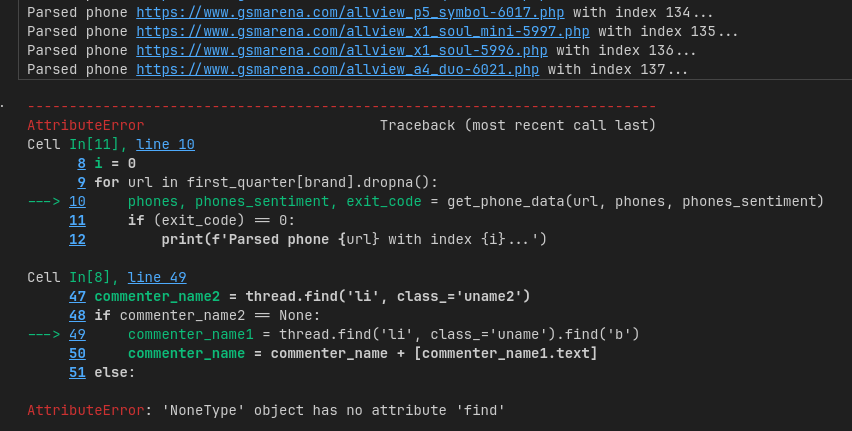

In [21]:
url # At what url the script crashed

'https://www.gsmarena.com/motorola_cd930-72.php'

In [100]:
rest_of_links.columns.get_loc('vivo') # Get index location of column at which stopped

20

In [67]:
phones.to_csv('new_phones-full.csv', index=False)
phones_sentiment.to_csv('new_phones-sentiment-full.csv', index=False)

In [94]:
phones, phones_sentiment, exit_code = get_phone_data('https://www.gsmarena.com/samsung_galaxy_f16-13721.php', phones, phones_sentiment) # Testing modified code

In [62]:
rest_of_links.iloc[303:]
#  https://www.gsmarena.com/vivo_y20s_[g]-10847.php redirect 30 times

303        https://www.gsmarena.com/vivo_x60t-10831.php
304        https://www.gsmarena.com/vivo_y30g-10819.php
305     https://www.gsmarena.com/vivo_x60_pro-10797.php
306         https://www.gsmarena.com/vivo_x60-10796.php
307     https://www.gsmarena.com/vivo_iqoo_z3-10811.php
                             ...                       
1395                                                NaN
1396                                                NaN
1397                                                NaN
1398                                                NaN
1399                                                NaN
Name: vivo, Length: 1097, dtype: object

In [63]:
i = 303
for url in rest_of_links.iloc[303:].dropna():
    phones, phones_sentiment, exit_code = get_phone_data(url, phones, phones_sentiment)
    if (exit_code) == 0:
        print(f'Parsed phone {url} with index {i}...')
        i+=1
        time.sleep(random.uniform(2, 3)) # Wait 2 seconds before next request in order not to get timed out
    elif exit_code == 2: # If the phone is older than 2020 then skip it.
        print(f'Finished with brand {brand}')
        time.sleep(random.uniform(2, 3))
        break
    else:
        print(f'Encountered error at index {i}')
        break
print(f'Finished with brand {brand}')

Parsed phone https://www.gsmarena.com/vivo_x60t-10831.php with index 303...
Parsed phone https://www.gsmarena.com/vivo_y30g-10819.php with index 304...
Parsed phone https://www.gsmarena.com/vivo_x60_pro-10797.php with index 305...
Parsed phone https://www.gsmarena.com/vivo_x60-10796.php with index 306...
Parsed phone https://www.gsmarena.com/vivo_iqoo_z3-10811.php with index 307...
Parsed phone https://www.gsmarena.com/vivo_y72_5g-10801.php with index 308...
Parsed phone https://www.gsmarena.com/vivo_iqoo_u3x-10803.php with index 309...
Parsed phone https://www.gsmarena.com/vivo_iqoo_neo5-10795.php with index 310...
Parsed phone https://www.gsmarena.com/vivo_s9-10767.php with index 311...
Parsed phone https://www.gsmarena.com/vivo_s9e-10779.php with index 312...
Parsed phone https://www.gsmarena.com/vivo_s7t-10704.php with index 313...
Parsed phone https://www.gsmarena.com/vivo_x60_pro+-10696.php with index 314...
Parsed phone https://www.gsmarena.com/vivo_y31-10692.php with index 315.

In [56]:
rest_of_links.iloc[255: ,25]

255     https://www.gsmarena.com/lg_optimus_4x_hd_p880...
256     https://www.gsmarena.com/lg_optimus_3d_max_p72...
257     https://www.gsmarena.com/lg_optimus_3d_cube_su...
258     https://www.gsmarena.com/lg_optimus_l7_p700-45...
259     https://www.gsmarena.com/lg_optimus_l5_e610-45...
                              ...                        
1395                                                  NaN
1396                                                  NaN
1397                                                  NaN
1398                                                  NaN
1399                                                  NaN
Name: lg, Length: 1145, dtype: object